In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 3)


In [2]:
# Reading in the training file
train_df = pd.read_csv("train.csv")
train_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Exploratory Data Analysis and Data Cleaning

In [3]:
# Training dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
# Training dataset summary statistics
train_df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000,50882.000,50882.000,50882.000,30631.000,50882.000,50882.000,50882.000
mean,25441.500,1732.789,44.856,42.739,2.439,15.115,14183.950,0.240
std,14688.513,1424.082,17.310,17.319,1.026,6.341,6590.075,0.427
min,1.000,1.000,18.000,16.000,1.000,1.000,2280.000,0.000
25%,12721.250,523.000,28.000,27.000,1.000,12.000,9248.000,0.000
50%,25441.500,1391.000,44.000,40.000,3.000,17.000,13178.000,0.000
75%,38161.750,2667.000,59.000,57.000,3.000,20.000,18096.000,0.000
max,50882.000,6194.000,75.000,75.000,4.000,22.000,43350.400,1.000


In [5]:
train_df['Health Indicator'].describe()

count     39191
unique        9
top          X1
freq      13010
Name: Health Indicator, dtype: object

In [6]:
train_df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

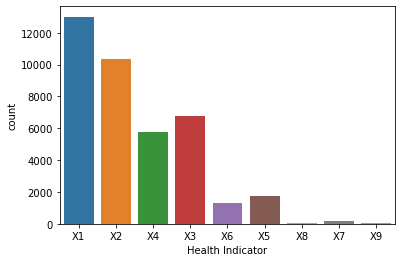

In [7]:
sns.countplot(x = train_df['Health Indicator'])

In [8]:
train_df['Holding_Policy_Type'].describe()

count    30631.000
mean         2.439
std          1.026
min          1.000
25%          1.000
50%          3.000
75%          3.000
max          4.000
Name: Holding_Policy_Type, dtype: float64

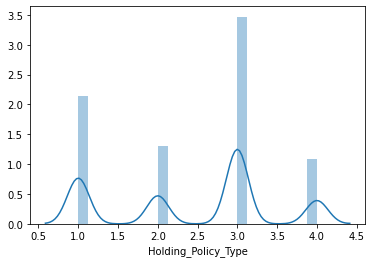

In [9]:
sns.distplot(train_df['Holding_Policy_Type'])

In [10]:
# Grouping data accoring to the holding policy type
train_df.groupby('Holding_Policy_Type')['Response'].mean()

Holding_Policy_Type
1.0    0.236
2.0    0.238
3.0    0.242
4.0    0.248
Name: Response, dtype: float64

In [11]:
train_df['Holding_Policy_Duration'].describe()

count     30631
unique       15
top         1.0
freq       4499
Name: Holding_Policy_Duration, dtype: object

In [12]:
train_df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [13]:
# Grouping data according to the holding policy Duration
train_df.groupby('Holding_Policy_Duration')['Response'].mean()

Holding_Policy_Duration
1.0     0.222
10.0    0.273
11.0    0.251
12.0    0.253
13.0    0.270
14+     0.251
14.0    0.247
2.0     0.237
3.0     0.232
4.0     0.241
5.0     0.238
6.0     0.235
7.0     0.257
8.0     0.257
9.0     0.238
Name: Response, dtype: float64

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [15]:
train_df.head(100)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [16]:
train_df.isnull().sum()/len(train_df)

ID                         0.000
City_Code                  0.000
Region_Code                0.000
Accomodation_Type          0.000
Reco_Insurance_Type        0.000
Upper_Age                  0.000
Lower_Age                  0.000
Is_Spouse                  0.000
Health Indicator           0.230
Holding_Policy_Duration    0.398
Holding_Policy_Type        0.398
Reco_Policy_Cat            0.000
Reco_Policy_Premium        0.000
Response                   0.000
dtype: float64

In [17]:
train_df['Health Indicator'] = train_df['Health Indicator'].fillna('X1')
train_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [18]:
train_df['Holding_Policy_Duration']  = train_df['Holding_Policy_Duration'].replace('14+', '15')

train_df[['Holding_Policy_Type', 'Holding_Policy_Duration']] = train_df[['Holding_Policy_Type', 'Holding_Policy_Duration']].fillna("0")

train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].astype('float32')
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].astype('int32')
train_df['Holding_Policy_Type'] = train_df['Holding_Policy_Type'].astype('int32')

train_df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  int32  
 10  Holding_Policy_Type      50882 non-null  int32  
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(1), int32(2

In [20]:
train_copy = train_df.copy()

In [21]:
pd.crosstab(train_df['Is_Spouse'], train_df['Reco_Insurance_Type'])

Reco_Insurance_Type,Individual,Joint
Is_Spouse,,
No,40536,1924
Yes,0,8422


In [22]:
pd.crosstab(train_df['Is_Spouse'], train_df['Response'])

Response,0,1
Is_Spouse,,
No,32303,10157
Yes,6370,2052


In [23]:
# Grouping data according to the presence of spouse
train_df.groupby('Is_Spouse')['Response'].mean()

Is_Spouse
No     0.239
Yes    0.244
Name: Response, dtype: float64

In [24]:
pd.crosstab(train_df['Accomodation_Type'], train_df['Response'])

Response,0,1
Accomodation_Type,,
Owned,21188,6763
Rented,17485,5446


In [25]:
# Grouping data according to the accomodation type
train_df.groupby('Accomodation_Type')['Response'].mean()

Accomodation_Type
Owned     0.242
Rented    0.237
Name: Response, dtype: float64

In [26]:
pd.crosstab(train_df['Health Indicator'], train_df['Response'])

Response,0,1
Health Indicator,,
X1,18787,5914
X2,7841,2491
X3,5163,1599
X4,4347,1396
X5,1319,408
X6,973,307
X7,134,62
X8,60,18
X9,49,14


In [27]:
# Grouping data according to the Health Indication
train_df.groupby('Health Indicator')['Response'].mean()

Health Indicator
X1    0.239
X2    0.241
X3    0.236
X4    0.243
X5    0.236
X6    0.240
X7    0.316
X8    0.231
X9    0.222
Name: Response, dtype: float64

Almost 1/4th of the people in every health indicator category has taken up the recommended insurance policy. 

In [28]:
# Grouping data according to accomodation type and health condition
train_df.groupby(['Health Indicator', 'Accomodation_Type'])['Response'].mean()

Health Indicator  Accomodation_Type
X1                Owned                0.239
                  Rented               0.240
X2                Owned                0.244
                  Rented               0.237
X3                Owned                0.247
                  Rented               0.227
X4                Owned                0.243
                  Rented               0.243
X5                Owned                0.237
                  Rented               0.235
X6                Owned                0.246
                  Rented               0.235
X7                Owned                0.359
                  Rented               0.196
X8                Owned                0.250
                  Rented               0.200
X9                Owned                0.194
                  Rented               0.259
Name: Response, dtype: float64

In [29]:
train_df['Age'] = (train_df['Lower_Age'] + train_df['Upper_Age']) // 2
train_df.head(25)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3,22,11628.0,0,36
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0,22,30510.0,0,48
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1,19,7450.0,1,32
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3,19,17780.0,0,50
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1,16,10404.0,0,44
5,6,C9,1785,Rented,Individual,52,52,No,X2,5,1,22,15264.0,1,52
6,7,C3,679,Owned,Individual,28,28,No,X1,0,0,17,10640.0,0,28
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9,4,17,29344.0,1,74
8,9,C15,3497,Owned,Joint,52,43,No,X1,14,3,1,27283.2,0,47
9,10,C1,530,Owned,Joint,59,26,Yes,X1,7,4,18,21100.8,1,42


In [30]:
age_bucket_mapper = lambda x: '> 25' if x < 25   else ('25-35' if (x >= 25 and x < 35) 
                                                  else ('35-45' if (x >= 35 and x < 45) 
                                                  else ('45-55' if (x >= 45 and x < 55) 
                                                  else ( '55-65' if (x >= 55 and x < 65) 
                                                  else ( '65-75' if (x >= 65 and x < 75) 
                                                  else ('> 75'))))))
train_df['Age_bucket'] = train_df['Age'].map(age_bucket_mapper)

train_df.head()





,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age,Age_bucket
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3,22,11628.0,0,36,35-45
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0,22,30510.0,0,48,45-55
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1,19,7450.0,1,32,25-35
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3,19,17780.0,0,50,45-55
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1,16,10404.0,0,44,35-45


In [31]:
# Grouping data according to the Health Indication
train_df.groupby('Age_bucket')['Response'].mean()

Age_bucket
25-35    0.247
35-45    0.249
45-55    0.245
55-65    0.230
65-75    0.242
> 25     0.224
> 75     0.235
Name: Response, dtype: float64

In [32]:
cat_cols = ['City_Code', 'Region_Code', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Reco_Policy_Cat', 'Age_bucket', 'Holding_Policy_Duration']



In [33]:
import category_encoders as ce

woe_encoder = ce.woe.WOEEncoder()
woe_ds = woe_encoder.fit_transform(train_df[cat_cols], train_df['Response'])

In [34]:
woe_ds.head()

,City_Code,Region_Code,Reco_Insurance_Type,Is_Spouse,Health Indicator,Reco_Policy_Cat,Age_bucket,Holding_Policy_Duration
0,-0.013,3213,-0.012,-0.004,-0.003,22,0.048,15
1,-0.052,1117,0.045,-0.004,0.006,22,0.027,0
2,-0.052,3732,-0.012,-0.004,-0.003,19,0.040,1
3,-0.022,4378,0.045,-0.004,-0.003,19,0.027,15
4,0.013,2190,-0.012,-0.004,0.006,16,0.048,3


In [35]:
woe_ds.columns = [x+'_woe' for x in woe_ds.columns]
woe_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City_Code_woe                50882 non-null  float64
 1   Region_Code_woe              50882 non-null  int64  
 2   Reco_Insurance_Type_woe      50882 non-null  float64
 3   Is_Spouse_woe                50882 non-null  float64
 4   Health Indicator_woe         50882 non-null  float64
 5   Reco_Policy_Cat_woe          50882 non-null  int64  
 6   Age_bucket_woe               50882 non-null  float64
 7   Holding_Policy_Duration_woe  50882 non-null  int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 2.9 MB


In [36]:
#Concatenating the woe dataset with the original dataset with the categorical columns
woe_concat = pd.concat([train_df, woe_ds])

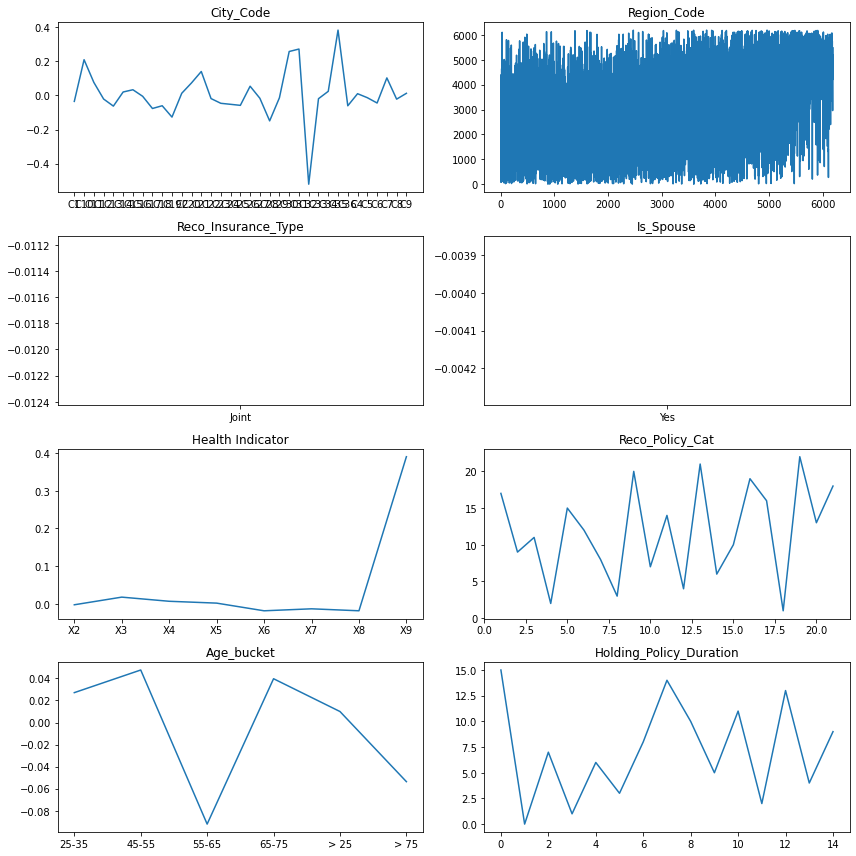

In [37]:
plt.figure(figsize = (12, 12))
for i in range(len(cat_cols)):
    plt.subplot(4, 2, i + 1)
    sns.lineplot(x = woe_concat[cat_cols[i]].unique(), y = woe_concat[cat_cols[i]+'_woe'].unique())
    plt.title(cat_cols[i])
    plt.tight_layout()

### Observations from Weight of Evidence plots

From the plots above, Health Indicator seems to have a slight monotonic trend to it, except for the X6 health condition. Let's try using that to build a model. The city code variable seems to have a lot of ups and downs, which indicates variablity in weight of evidence. Let's use that as well. 

Selected Variables: Health Indicator, City Code

In [38]:
def calculate_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')
    
    return dset, iv

for col in train_df[cat_cols].columns:
    if col == 'Response': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_iv(train_df, col, 'Response')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: City_Code
   Value   All  Good   Bad  Distr_Good  Distr_Bad    WoE         IV
33   C30    58    40    18   1.034e-03  1.474e-03 -0.354  1.560e-04
32   C32   160   114    46   2.948e-03  3.768e-03 -0.245  2.012e-04
34   C35    56    40    16   1.034e-03  1.311e-03 -0.237  6.537e-05
14   C34   130    94    36   2.431e-03  2.949e-03 -0.193  1.001e-04
29   C23   587   431   156   1.114e-02  1.278e-02 -0.137  2.232e-04
8    C27   295   219    76   5.663e-03  6.225e-03 -0.095  5.319e-05
25   C13  1005   750   255   1.939e-02  2.089e-02 -0.074  1.107e-04
9     C7  1910  1426   484   3.687e-02  3.964e-02 -0.072  2.006e-04
20   C33   286   215    71   5.559e-03  5.815e-03 -0.045  1.152e-05
5     C1  8973  6765  2208   1.749e-01  1.809e-01 -0.033  1.972e-04
13    C2  7747  5854  1893   1.514e-01  1.550e-01 -0.024  8.829e-05
26   C11  1147   868   279   2.244e-02  2.285e-02 -0.018  7.328e-06
12    C4  3671  2782   889   7.194e-02  7.282e-02 -0.012  1.067e-05
3     C8  1806 

### Observations from Information Score values for different variables
From the IV Scores for various columns, it is clear that Region Code and Recommended Policy Category have a high prediction power. Therefore, let's use them as well as prediction variables for the model. 

Selected Variables: Region Code, Recommended Policy Category

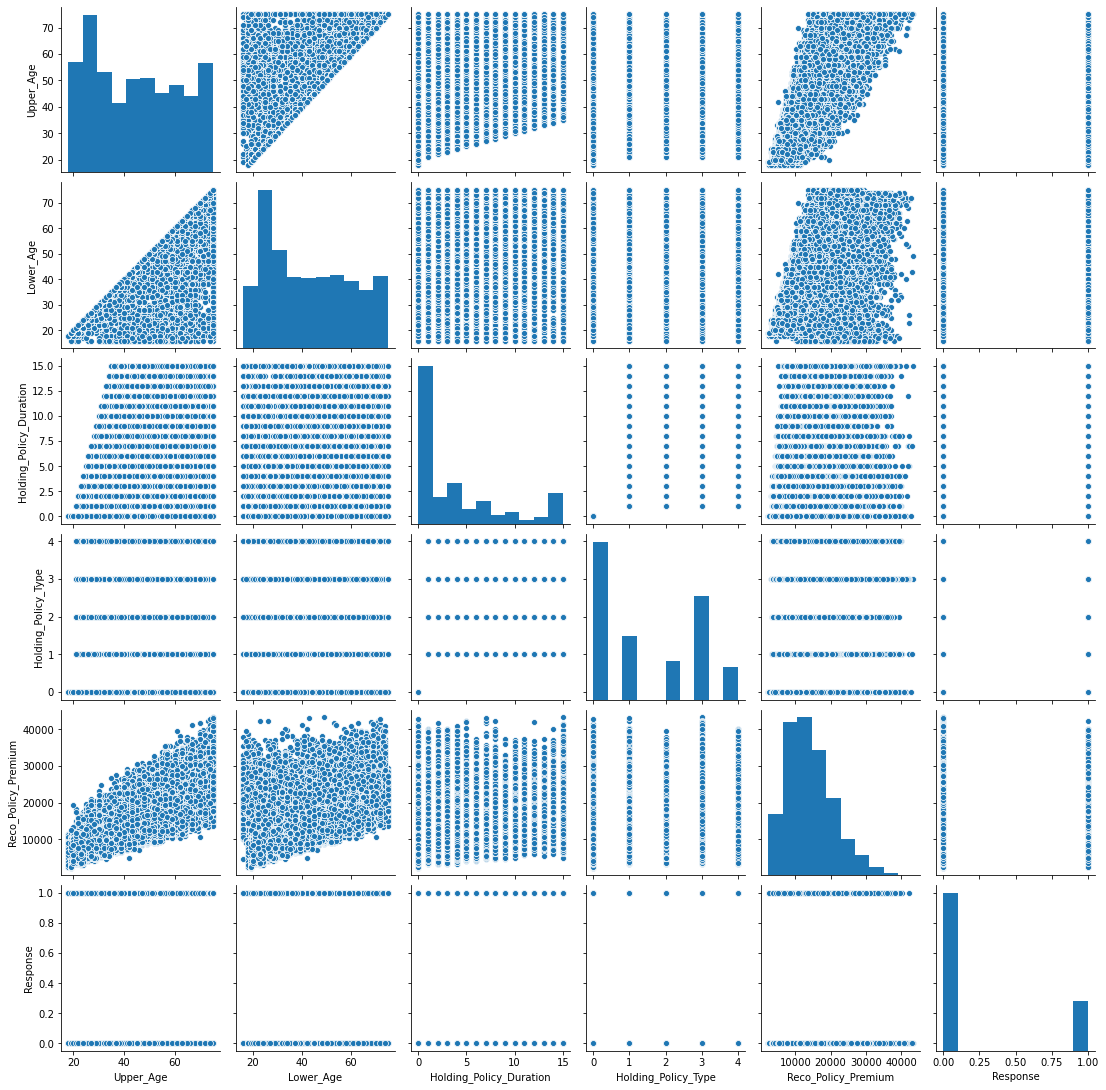

In [39]:
sns.pairplot(data = train_df[['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Premium', 'Response']])
plt.show()

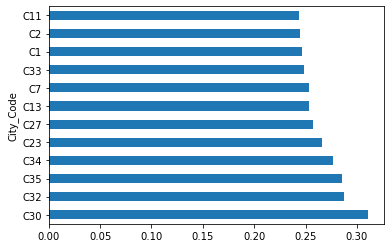

In [40]:
# Exploring city code further
Response_city_code = train_df.groupby('City_Code')['Response'].mean()
Response_city_code.nlargest(12).plot(kind = 'barh')
plt.show()

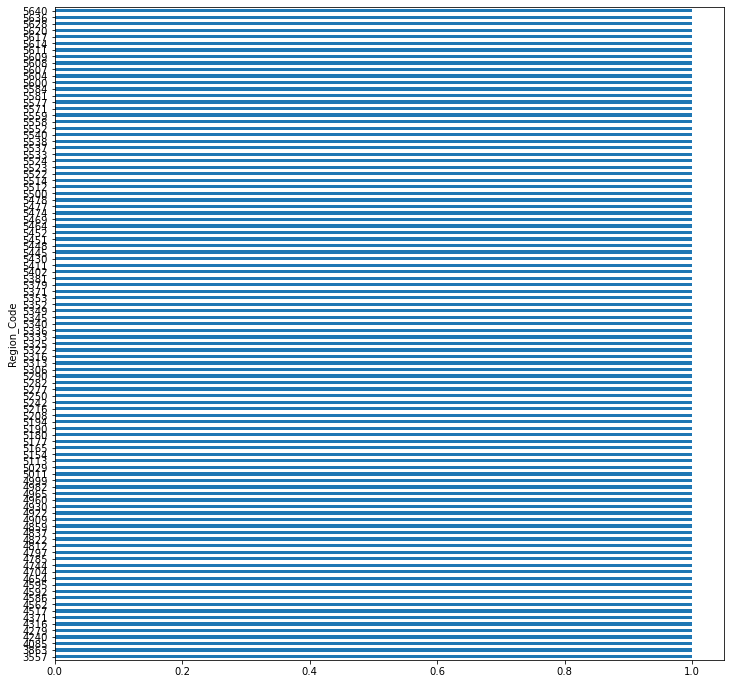

In [41]:
Response_region_code = train_df.groupby('Region_Code')['Response'].mean()
plt.figure(figsize= (12, 12))
Response_region_code.nlargest(100).plot(kind = 'barh')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

y = train_df.pop('Response')
X = train_df.set_index('ID')

X.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Age,Age_bucket
ID,,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,15,3,22,11628.0,36,35-45
2,C5,1117,Owned,Joint,75,22,No,X2,0,0,22,30510.0,48,45-55
3,C5,3732,Owned,Individual,32,32,No,X1,1,1,19,7450.0,32,25-35
4,C24,4378,Owned,Joint,52,48,No,X1,15,3,19,17780.0,50,45-55
5,C8,2190,Rented,Individual,44,44,No,X2,3,1,16,10404.0,44,35-45


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 1 to 50882
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  int32  
 9   Holding_Policy_Type      50882 non-null  int32  
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Age                      50882 non-null  int64  
 13  Age_bucket               50882 non-null  object 
dtypes: float64(1), int32(2

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38161 entries, 21213 to 15796
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                38161 non-null  object 
 1   Region_Code              38161 non-null  int64  
 2   Accomodation_Type        38161 non-null  object 
 3   Reco_Insurance_Type      38161 non-null  object 
 4   Upper_Age                38161 non-null  int64  
 5   Lower_Age                38161 non-null  int64  
 6   Is_Spouse                38161 non-null  object 
 7   Health Indicator         38161 non-null  object 
 8   Holding_Policy_Duration  38161 non-null  int32  
 9   Holding_Policy_Type      38161 non-null  int32  
 10  Reco_Policy_Cat          38161 non-null  int64  
 11  Reco_Policy_Premium      38161 non-null  float64
 12  Age                      38161 non-null  int64  
 13  Age_bucket               38161 non-null  object 
dtypes: float64(1), int

In [45]:
cat_features = ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Age_bucket']


### Building a Vanilla Catboost model with all the features to use the feature importances attribute to confirm the findings from EDA

In [46]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(random_seed = 42, cat_features = cat_features)

model.fit(X_train, y_train)

Learning rate set to 0.048785
0:	learn: 0.6773843	total: 219ms	remaining: 3m 38s
1:	learn: 0.6608809	total: 437ms	remaining: 3m 38s
2:	learn: 0.6468013	total: 510ms	remaining: 2m 49s
3:	learn: 0.6329803	total: 627ms	remaining: 2m 36s
4:	learn: 0.6218947	total: 753ms	remaining: 2m 29s
5:	learn: 0.6122500	total: 894ms	remaining: 2m 28s
6:	learn: 0.6036040	total: 962ms	remaining: 2m 16s
7:	learn: 0.5947662	total: 1.07s	remaining: 2m 12s
8:	learn: 0.5878915	total: 1.11s	remaining: 2m 2s
9:	learn: 0.5816444	total: 1.16s	remaining: 1m 54s
10:	learn: 0.5769604	total: 1.2s	remaining: 1m 47s
11:	learn: 0.5711758	total: 1.3s	remaining: 1m 46s
12:	learn: 0.5674143	total: 1.36s	remaining: 1m 43s
13:	learn: 0.5626675	total: 1.49s	remaining: 1m 45s
14:	learn: 0.5596443	total: 1.52s	remaining: 1m 39s
15:	learn: 0.5565391	total: 1.59s	remaining: 1m 37s
16:	learn: 0.5527906	total: 1.68s	remaining: 1m 37s
17:	learn: 0.5450406	total: 1.83s	remaining: 1m 39s
18:	learn: 0.5377309	total: 1.97s	remaining: 1m

157:	learn: 0.4420716	total: 18.8s	remaining: 1m 40s
158:	learn: 0.4420247	total: 18.9s	remaining: 1m 40s
159:	learn: 0.4419745	total: 19.1s	remaining: 1m 40s
160:	learn: 0.4418265	total: 19.2s	remaining: 1m 40s
161:	learn: 0.4418040	total: 19.3s	remaining: 1m 39s
162:	learn: 0.4417178	total: 19.4s	remaining: 1m 39s
163:	learn: 0.4416539	total: 19.6s	remaining: 1m 39s
164:	learn: 0.4416255	total: 19.7s	remaining: 1m 39s
165:	learn: 0.4415667	total: 19.8s	remaining: 1m 39s
166:	learn: 0.4415179	total: 20s	remaining: 1m 39s
167:	learn: 0.4414507	total: 20.1s	remaining: 1m 39s
168:	learn: 0.4414255	total: 20.2s	remaining: 1m 39s
169:	learn: 0.4413333	total: 20.4s	remaining: 1m 39s
170:	learn: 0.4412520	total: 20.5s	remaining: 1m 39s
171:	learn: 0.4411842	total: 20.7s	remaining: 1m 39s
172:	learn: 0.4411306	total: 20.8s	remaining: 1m 39s
173:	learn: 0.4410848	total: 20.9s	remaining: 1m 39s
174:	learn: 0.4410584	total: 21s	remaining: 1m 39s
175:	learn: 0.4409631	total: 21.1s	remaining: 1m 3

313:	learn: 0.4322488	total: 39s	remaining: 1m 25s
314:	learn: 0.4321861	total: 39.2s	remaining: 1m 25s
315:	learn: 0.4320755	total: 39.3s	remaining: 1m 25s
316:	learn: 0.4320487	total: 39.5s	remaining: 1m 25s
317:	learn: 0.4319821	total: 39.6s	remaining: 1m 24s
318:	learn: 0.4319315	total: 39.7s	remaining: 1m 24s
319:	learn: 0.4319047	total: 39.9s	remaining: 1m 24s
320:	learn: 0.4318376	total: 40s	remaining: 1m 24s
321:	learn: 0.4317771	total: 40.1s	remaining: 1m 24s
322:	learn: 0.4317476	total: 40.2s	remaining: 1m 24s
323:	learn: 0.4316801	total: 40.4s	remaining: 1m 24s
324:	learn: 0.4316113	total: 40.5s	remaining: 1m 24s
325:	learn: 0.4315487	total: 40.7s	remaining: 1m 24s
326:	learn: 0.4315084	total: 40.8s	remaining: 1m 23s
327:	learn: 0.4314538	total: 40.9s	remaining: 1m 23s
328:	learn: 0.4314041	total: 41s	remaining: 1m 23s
329:	learn: 0.4313518	total: 41.2s	remaining: 1m 23s
330:	learn: 0.4313373	total: 41.3s	remaining: 1m 23s
331:	learn: 0.4312815	total: 41.4s	remaining: 1m 23s

470:	learn: 0.4245474	total: 59.3s	remaining: 1m 6s
471:	learn: 0.4245072	total: 59.5s	remaining: 1m 6s
472:	learn: 0.4244717	total: 59.6s	remaining: 1m 6s
473:	learn: 0.4244025	total: 59.7s	remaining: 1m 6s
474:	learn: 0.4243303	total: 59.8s	remaining: 1m 6s
475:	learn: 0.4242538	total: 59.9s	remaining: 1m 5s
476:	learn: 0.4242186	total: 1m	remaining: 1m 5s
477:	learn: 0.4241740	total: 1m	remaining: 1m 5s
478:	learn: 0.4241628	total: 1m	remaining: 1m 5s
479:	learn: 0.4241179	total: 1m	remaining: 1m 5s
480:	learn: 0.4240538	total: 1m	remaining: 1m 5s
481:	learn: 0.4239582	total: 1m	remaining: 1m 5s
482:	learn: 0.4239269	total: 1m	remaining: 1m 5s
483:	learn: 0.4239089	total: 1m	remaining: 1m 4s
484:	learn: 0.4238900	total: 1m 1s	remaining: 1m 4s
485:	learn: 0.4238677	total: 1m 1s	remaining: 1m 4s
486:	learn: 0.4238366	total: 1m 1s	remaining: 1m 4s
487:	learn: 0.4237879	total: 1m 1s	remaining: 1m 4s
488:	learn: 0.4237669	total: 1m 1s	remaining: 1m 4s
489:	learn: 0.4236918	total: 1m 1s	r

628:	learn: 0.4170458	total: 1m 19s	remaining: 47.1s
629:	learn: 0.4170197	total: 1m 20s	remaining: 47s
630:	learn: 0.4169736	total: 1m 20s	remaining: 46.9s
631:	learn: 0.4169207	total: 1m 20s	remaining: 46.8s
632:	learn: 0.4168701	total: 1m 20s	remaining: 46.6s
633:	learn: 0.4168260	total: 1m 20s	remaining: 46.5s
634:	learn: 0.4167699	total: 1m 20s	remaining: 46.4s
635:	learn: 0.4167483	total: 1m 20s	remaining: 46.3s
636:	learn: 0.4167220	total: 1m 20s	remaining: 46.1s
637:	learn: 0.4166472	total: 1m 21s	remaining: 46s
638:	learn: 0.4166302	total: 1m 21s	remaining: 45.9s
639:	learn: 0.4165739	total: 1m 21s	remaining: 45.8s
640:	learn: 0.4165164	total: 1m 21s	remaining: 45.7s
641:	learn: 0.4164374	total: 1m 21s	remaining: 45.5s
642:	learn: 0.4163443	total: 1m 21s	remaining: 45.4s
643:	learn: 0.4163258	total: 1m 21s	remaining: 45.3s
644:	learn: 0.4163025	total: 1m 22s	remaining: 45.2s
645:	learn: 0.4162506	total: 1m 22s	remaining: 45s
646:	learn: 0.4162127	total: 1m 22s	remaining: 44.9s

784:	learn: 0.4103537	total: 1m 41s	remaining: 27.7s
785:	learn: 0.4103354	total: 1m 41s	remaining: 27.6s
786:	learn: 0.4102995	total: 1m 41s	remaining: 27.5s
787:	learn: 0.4102736	total: 1m 41s	remaining: 27.3s
788:	learn: 0.4102241	total: 1m 41s	remaining: 27.2s
789:	learn: 0.4101901	total: 1m 41s	remaining: 27.1s
790:	learn: 0.4101707	total: 1m 42s	remaining: 27s
791:	learn: 0.4101500	total: 1m 42s	remaining: 26.8s
792:	learn: 0.4100839	total: 1m 42s	remaining: 26.7s
793:	learn: 0.4100398	total: 1m 42s	remaining: 26.6s
794:	learn: 0.4100140	total: 1m 42s	remaining: 26.5s
795:	learn: 0.4099916	total: 1m 42s	remaining: 26.3s
796:	learn: 0.4099208	total: 1m 42s	remaining: 26.2s
797:	learn: 0.4098735	total: 1m 43s	remaining: 26.1s
798:	learn: 0.4098411	total: 1m 43s	remaining: 25.9s
799:	learn: 0.4097831	total: 1m 43s	remaining: 25.8s
800:	learn: 0.4097595	total: 1m 43s	remaining: 25.7s
801:	learn: 0.4097024	total: 1m 43s	remaining: 25.6s
802:	learn: 0.4096689	total: 1m 43s	remaining: 2

941:	learn: 0.4044194	total: 2m 2s	remaining: 7.53s
942:	learn: 0.4043719	total: 2m 2s	remaining: 7.4s
943:	learn: 0.4043324	total: 2m 2s	remaining: 7.27s
944:	learn: 0.4042857	total: 2m 2s	remaining: 7.14s
945:	learn: 0.4042416	total: 2m 2s	remaining: 7.01s
946:	learn: 0.4042108	total: 2m 2s	remaining: 6.88s
947:	learn: 0.4041826	total: 2m 3s	remaining: 6.75s
948:	learn: 0.4041649	total: 2m 3s	remaining: 6.62s
949:	learn: 0.4041411	total: 2m 3s	remaining: 6.49s
950:	learn: 0.4040984	total: 2m 3s	remaining: 6.36s
951:	learn: 0.4040433	total: 2m 3s	remaining: 6.23s
952:	learn: 0.4040030	total: 2m 3s	remaining: 6.1s
953:	learn: 0.4039857	total: 2m 3s	remaining: 5.97s
954:	learn: 0.4039548	total: 2m 4s	remaining: 5.84s
955:	learn: 0.4038970	total: 2m 4s	remaining: 5.71s
956:	learn: 0.4038691	total: 2m 4s	remaining: 5.58s
957:	learn: 0.4038267	total: 2m 4s	remaining: 5.46s
958:	learn: 0.4037555	total: 2m 4s	remaining: 5.33s
959:	learn: 0.4037337	total: 2m 4s	remaining: 5.2s
960:	learn: 0.4

In [47]:
from sklearn.metrics import roc_auc_score

y_pred_train = model.predict(X_train)

roc_auc_score(y_train, y_pred_train)

0.7052041220281273

In [48]:
y_pred_val = model.predict(X_val)
roc_auc_score(y_val, y_pred_val)

0.6156529848128147

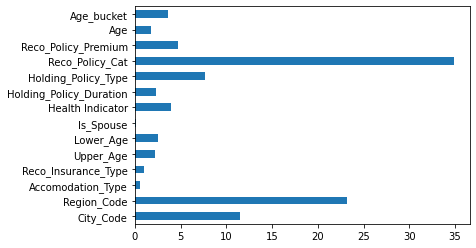

In [49]:
feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feature_importances.plot(kind = 'barh')

In [50]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [51]:
Id_test = pd.DataFrame(test_df['ID'])
test_df = test_df.set_index('ID')
test_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
ID,,,,,,,,,,,,
50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50883 to 72687
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         16778 non-null  object 
 8   Holding_Policy_Duration  13202 non-null  object 
 9   Holding_Policy_Type      13202 non-null  float64
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.2+ MB


In [53]:
test_df[['Holding_Policy_Duration', 'Holding_Policy_Type']] = test_df[['Holding_Policy_Duration', 'Holding_Policy_Type']].fillna(0)
test_df['Holding_Policy_Duration']  = test_df['Holding_Policy_Duration'].replace('14+', '15')
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype('float32')
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype('int32')
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].astype('int32')



test_df['Health Indicator'] = test_df['Health Indicator'].fillna('X1')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50883 to 72687
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         21805 non-null  object 
 8   Holding_Policy_Duration  21805 non-null  int32  
 9   Holding_Policy_Type      21805 non-null  int32  
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 2.0+ MB


In [54]:
test_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
ID,,,,,,,,,,,,
50883,C1,156,Owned,Individual,30,30,No,X1,6,3,5,11934.0
50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3,18,32204.8
50885,C1,564,Rented,Individual,28,28,No,X3,2,4,17,9240.0
50886,C3,1177,Rented,Individual,23,23,No,X3,3,3,18,9086.0
50887,C1,951,Owned,Individual,75,75,No,X3,0,0,5,22534.0


In [55]:
test_df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [56]:
test_df[test_df['Health Indicator'].isnull()]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
ID,,,,,,,,,,,,


In [57]:
test_df['Health Indicator'] = test_df['Health Indicator'].fillna('X1')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50883 to 72687
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         21805 non-null  object 
 8   Holding_Policy_Duration  21805 non-null  int32  
 9   Holding_Policy_Type      21805 non-null  int32  
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 2.0+ MB


In [58]:
test_df['Age'] = (test_df['Upper_Age'] + test_df['Lower_Age']) // 2
test_df['Age_bucket'] = test_df['Age'].map(age_bucket_mapper) 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50883 to 72687
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         21805 non-null  object 
 8   Holding_Policy_Duration  21805 non-null  int32  
 9   Holding_Policy_Type      21805 non-null  int32  
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
 12  Age                      21805 non-null  int64  
 13  Age_bucket               21805 non-null  object 
dtypes: float64(1), int

In [59]:
y_pred_test = model.predict(test_df)

y_pred_test[0:5]


array([0, 0, 1, 0, 0], dtype=int64)

In [60]:
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Response'])
y_pred_test = pd.concat([Id_test, y_pred_test], axis = 1)
y_pred_test.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,1
3,50886,0
4,50887,0


In [61]:
y_pred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        21805 non-null  int64
 1   Response  21805 non-null  int64
dtypes: int64(2)
memory usage: 340.8 KB


In [62]:
y_pred_test.isnull().sum()

ID          0
Response    0
dtype: int64

In [63]:
Id_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      21805 non-null  int64
dtypes: int64(1)
memory usage: 170.5 KB


In [64]:
from IPython.display import HTML

y_pred_test_1 = y_pred_test.to_csv("y_pred_test_1.csv", index = False)

def create_download_link(filename, title = 'test_preds'):
    html = '<a href = {filename}>{title}</a>'
    html = html.format(title = title, filename = filename)
    return HTML(html)

create_download_link(filename = 'y_pred_test_1.csv')


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38161 entries, 21213 to 15796
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                38161 non-null  object 
 1   Region_Code              38161 non-null  int64  
 2   Accomodation_Type        38161 non-null  object 
 3   Reco_Insurance_Type      38161 non-null  object 
 4   Upper_Age                38161 non-null  int64  
 5   Lower_Age                38161 non-null  int64  
 6   Is_Spouse                38161 non-null  object 
 7   Health Indicator         38161 non-null  object 
 8   Holding_Policy_Duration  38161 non-null  int32  
 9   Holding_Policy_Type      38161 non-null  int32  
 10  Reco_Policy_Cat          38161 non-null  int64  
 11  Reco_Policy_Premium      38161 non-null  float64
 12  Age                      38161 non-null  int64  
 13  Age_bucket               38161 non-null  object 
dtypes: float64(1), int

## EDA and Feature Engineering

In [66]:
print("Number of Recommended policy categories in the training set: {0} ".format(train_df['Reco_Policy_Cat'].nunique()))
print("Number of Recommended policy categories in the test set: {0}" .format(test_df['Reco_Policy_Cat'].nunique()))

Number of Recommended policy categories in the training set: 22 
Number of Recommended policy categories in the test set: 22


In [67]:
print("Number of Region Codes in the training set: {0} ".format(train_df['Region_Code'].nunique()))
print("Number of Region Codes in the test set: {0} ".format(test_df['Region_Code'].nunique()))

Number of Region Codes in the training set: 5316 
Number of Region Codes in the test set: 4694 


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

region_code = train_copy[['Region_Code', 'Response']]
region_train, region_test = train_test_split(region_code, test_size = 0.4)

kmeans_1 = KMeans(n_clusters = 4, n_init = 15)

cluster_4 = kmeans_1.fit_predict(region_train)
cluster_4[0:25]

array([1, 1, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 3, 0, 1, 0, 2, 1, 3, 0, 1, 1,
       2, 0, 3])

In [69]:
kmeans_1.labels_

array([1, 1, 1, ..., 2, 1, 0])

In [70]:
silhouette_score(region_train, kmeans_1.predict(region_train))

0.5750475866902305

In [71]:
region_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30529 entries, 22643 to 44454
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Region_Code  30529 non-null  int64
 1   Response     30529 non-null  int64
dtypes: int64(2)
memory usage: 715.5 KB


In [73]:
region_train['Cluster_num'] = kmeans_1.predict(region_train)

region_train.head(35)

,Region_Code,Response,Cluster_num
22643,484,0,1
7804,482,1,1
34303,490,0,1
27729,1529,0,3
35683,1309,0,3
6571,323,0,1
27541,1,0,1
4562,1498,1,3
174,4659,0,2
25744,1747,0,3


In [74]:
region_train.Region_Code.value_counts()[0:12]`

SyntaxError: invalid syntax (<ipython-input-74-88056fe162b7>, line 1)

In [ ]:
region_train[region_train['Region_Code'] == 1]

In [ ]:
region_train.info()

In [ ]:
region_train.drop(columns = 'Cluster_num', inplace = True)
region_train.info()

In [ ]:
len(region_test[region_test.Region_Code.isin(region_train.Region_Code)])

In [ ]:
len(region_test)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = {}

for i in range(2, 8): 
    kmeans = KMeans(n_clusters = i, n_init = 15, max_iter = 70)
    kmeans.fit(region_train)
    clust_preds = kmeans.labels_
    sil_score = silhouette_score(region_train, clust_preds) 
    
    silhouette_scores[i] = sil_score
    

In [ ]:
plt.figure(figsize = (10, 10))

sns.lineplot(x = silhouette_scores.keys(), y = silhouette_scores.values())
plt.show()

In [75]:
kmeans_2 = KMeans(n_clusters = 3)
kmeans_2.fit(region_code)

region_code['Cluster_num'] = kmeans_2.predict(region_code)


cluster_region_grouped_mean = region_code.groupby('Cluster_num')['Response'].mean()
cluster_region_grouped_median = region_code.groupby('Cluster_num')['Response'].median()

cluster_region_grouped_mean

Cluster_num
0    0.240
1    0.240
2    0.239
Name: Response, dtype: float64

In [76]:
cluster_region_grouped_mean

Cluster_num
0    0.240
1    0.240
2    0.239
Name: Response, dtype: float64

In [77]:
train_df['Health Indicator'] = train_df['Health Indicator'].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  object  
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  object  
 4   Reco_Insurance_Type      50882 non-null  object  
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  object  
 8   Health Indicator         50882 non-null  category
 9   Holding_Policy_Duration  50882 non-null  int32   
 10  Holding_Policy_Type      50882 non-null  int32   
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Age                      50882 non-null  int64   
 14  Age_bu

In [78]:
y = y
X = train_df.drop(columns = ['ID'])

In [79]:
useful_cat_features = ['Health Indicator', 'Region_Code', 'Reco_Policy_Cat', 'Age_bucket', 'City_Code', 'Holding_Policy_Type']

X_naive_train, X_naive_test, y_naive_train, y_naive_test = train_test_split(X[useful_cat_features], y, test_size = 0.15)
X_naive_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43249 entries, 25814 to 40563
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Health Indicator     43249 non-null  category
 1   Region_Code          43249 non-null  int64   
 2   Reco_Policy_Cat      43249 non-null  int64   
 3   Age_bucket           43249 non-null  object  
 4   City_Code            43249 non-null  object  
 5   Holding_Policy_Type  43249 non-null  int32   
dtypes: category(1), int32(1), int64(2), object(2)
memory usage: 1.9+ MB


In [80]:
# Encoding the categorical variables to feed it into the categorical naive bayes model
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X_naive_train['Health Indicator'] = X_naive_train['Health Indicator'].cat.codes

X_naive_train['City_Code'] = X_naive_train['City_Code'].astype('category')
X_naive_train['City_Code'] = X_naive_train['City_Code'].cat.codes

ordinal_encoder = OrdinalEncoder()

X_naive_train['Age_bucket'] = ordinal_encoder.fit_transform(X_naive_train['Age_bucket'].values.reshape(-1, 1))

X_naive_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43249 entries, 25814 to 40563
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Health Indicator     43249 non-null  int8   
 1   Region_Code          43249 non-null  int64  
 2   Reco_Policy_Cat      43249 non-null  int64  
 3   Age_bucket           43249 non-null  float64
 4   City_Code            43249 non-null  int8   
 5   Holding_Policy_Type  43249 non-null  int32  
dtypes: float64(1), int32(1), int64(2), int8(2)
memory usage: 1.6 MB


In [81]:
from sklearn.naive_bayes import CategoricalNB


cat_naive = CategoricalNB()
cat_naive.fit(X_naive_train, y_naive_train)

cat_naive_train_preds = cat_naive.predict(X_naive_train)


In [82]:
X_naive_train.head()

,Health Indicator,Region_Code,Reco_Policy_Cat,Age_bucket,City_Code,Holding_Policy_Type
25814,3,91,18,0.0,15,3
6517,0,209,22,5.0,30,0
40420,2,730,20,2.0,34,3
45514,3,1481,3,1.0,11,3
39501,0,3111,16,0.0,11,1


In [83]:
roc_auc_score(y_naive_train, cat_naive_train_preds)

0.5467355604147238

In [84]:
cat_naive_train_preds_proba = cat_naive.predict_proba(X_naive_train)
cat_naive_train_preds_proba[0:10]

array([[0.75247075, 0.24752925],
       [0.72657698, 0.27342302],
       [0.71936738, 0.28063262],
       [0.84665748, 0.15334252],
       [0.77949671, 0.22050329],
       [0.86951255, 0.13048745],
       [0.80431024, 0.19568976],
       [0.78955169, 0.21044831],
       [0.87890632, 0.12109368],
       [0.8984521 , 0.1015479 ]])

In [85]:
for i in X_naive_train.columns:
    print(f"Number of unique values in {i}: {X_naive_train[i].nunique()}")

Number of unique values in Health Indicator: 9
Number of unique values in Region_Code: 5217
Number of unique values in Reco_Policy_Cat: 22
Number of unique values in Age_bucket: 7
Number of unique values in City_Code: 36
Number of unique values in Holding_Policy_Type: 5


In [86]:
useful_cat_features = ['Health Indicator', 'Region_Code', 'Reco_Policy_Cat', 'Age_bucket', 'City_Code', 'Holding_Policy_Type']

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X[useful_cat_features + ['Reco_Policy_Premium']], y, test_size = 0.2)
X_cat_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40705 entries, 37260 to 40386
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Health Indicator     40705 non-null  category
 1   Region_Code          40705 non-null  int64   
 2   Reco_Policy_Cat      40705 non-null  int64   
 3   Age_bucket           40705 non-null  object  
 4   City_Code            40705 non-null  object  
 5   Holding_Policy_Type  40705 non-null  int32   
 6   Reco_Policy_Premium  40705 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(2), object(2)
memory usage: 2.1+ MB


In [87]:

model = CatBoostClassifier(random_seed = 42, cat_features = useful_cat_features)

model.fit(X_cat_train, y_cat_train)

Learning rate set to 0.050148
0:	learn: 0.6757911	total: 127ms	remaining: 2m 7s
1:	learn: 0.6592843	total: 240ms	remaining: 1m 59s
2:	learn: 0.6449933	total: 366ms	remaining: 2m 1s
3:	learn: 0.6328499	total: 417ms	remaining: 1m 43s
4:	learn: 0.6217268	total: 500ms	remaining: 1m 39s
5:	learn: 0.6136683	total: 534ms	remaining: 1m 28s
6:	learn: 0.6042050	total: 667ms	remaining: 1m 34s
7:	learn: 0.5958636	total: 774ms	remaining: 1m 35s
8:	learn: 0.5877926	total: 882ms	remaining: 1m 37s
9:	learn: 0.5816415	total: 952ms	remaining: 1m 34s
10:	learn: 0.5762622	total: 996ms	remaining: 1m 29s
11:	learn: 0.5695788	total: 1.09s	remaining: 1m 29s
12:	learn: 0.5586088	total: 1.21s	remaining: 1m 31s
13:	learn: 0.5491678	total: 1.31s	remaining: 1m 32s
14:	learn: 0.5408597	total: 1.4s	remaining: 1m 32s
15:	learn: 0.5340827	total: 1.47s	remaining: 1m 30s
16:	learn: 0.5276653	total: 1.54s	remaining: 1m 29s
17:	learn: 0.5222698	total: 1.66s	remaining: 1m 30s
18:	learn: 0.5169055	total: 1.76s	remaining: 1m

157:	learn: 0.4441573	total: 17.4s	remaining: 1m 32s
158:	learn: 0.4441220	total: 17.5s	remaining: 1m 32s
159:	learn: 0.4440455	total: 17.7s	remaining: 1m 32s
160:	learn: 0.4439721	total: 17.8s	remaining: 1m 32s
161:	learn: 0.4438782	total: 17.9s	remaining: 1m 32s
162:	learn: 0.4438596	total: 18s	remaining: 1m 32s
163:	learn: 0.4438096	total: 18.1s	remaining: 1m 32s
164:	learn: 0.4437158	total: 18.2s	remaining: 1m 32s
165:	learn: 0.4436512	total: 18.3s	remaining: 1m 32s
166:	learn: 0.4435665	total: 18.4s	remaining: 1m 31s
167:	learn: 0.4435037	total: 18.5s	remaining: 1m 31s
168:	learn: 0.4434164	total: 18.6s	remaining: 1m 31s
169:	learn: 0.4433796	total: 18.7s	remaining: 1m 31s
170:	learn: 0.4433506	total: 18.8s	remaining: 1m 31s
171:	learn: 0.4433015	total: 18.9s	remaining: 1m 31s
172:	learn: 0.4432622	total: 19s	remaining: 1m 30s
173:	learn: 0.4431949	total: 19.1s	remaining: 1m 30s
174:	learn: 0.4431584	total: 19.2s	remaining: 1m 30s
175:	learn: 0.4431299	total: 19.3s	remaining: 1m 3

315:	learn: 0.4340638	total: 36.7s	remaining: 1m 19s
316:	learn: 0.4340110	total: 36.8s	remaining: 1m 19s
317:	learn: 0.4339465	total: 37s	remaining: 1m 19s
318:	learn: 0.4339024	total: 37.1s	remaining: 1m 19s
319:	learn: 0.4338542	total: 37.2s	remaining: 1m 19s
320:	learn: 0.4338220	total: 37.3s	remaining: 1m 18s
321:	learn: 0.4338026	total: 37.5s	remaining: 1m 18s
322:	learn: 0.4337450	total: 37.6s	remaining: 1m 18s
323:	learn: 0.4336855	total: 37.7s	remaining: 1m 18s
324:	learn: 0.4335660	total: 37.8s	remaining: 1m 18s
325:	learn: 0.4335325	total: 38s	remaining: 1m 18s
326:	learn: 0.4334520	total: 38.1s	remaining: 1m 18s
327:	learn: 0.4334333	total: 38.3s	remaining: 1m 18s
328:	learn: 0.4333858	total: 38.4s	remaining: 1m 18s
329:	learn: 0.4333397	total: 38.6s	remaining: 1m 18s
330:	learn: 0.4332992	total: 38.7s	remaining: 1m 18s
331:	learn: 0.4332470	total: 38.8s	remaining: 1m 18s
332:	learn: 0.4331543	total: 39s	remaining: 1m 18s
333:	learn: 0.4331146	total: 39.1s	remaining: 1m 17s

472:	learn: 0.4266131	total: 55.9s	remaining: 1m 2s
473:	learn: 0.4265450	total: 55.9s	remaining: 1m 2s
474:	learn: 0.4265108	total: 56.1s	remaining: 1m 1s
475:	learn: 0.4264786	total: 56.2s	remaining: 1m 1s
476:	learn: 0.4264469	total: 56.3s	remaining: 1m 1s
477:	learn: 0.4264199	total: 56.4s	remaining: 1m 1s
478:	learn: 0.4264068	total: 56.5s	remaining: 1m 1s
479:	learn: 0.4263510	total: 56.6s	remaining: 1m 1s
480:	learn: 0.4263107	total: 56.8s	remaining: 1m 1s
481:	learn: 0.4262807	total: 56.9s	remaining: 1m 1s
482:	learn: 0.4262619	total: 57s	remaining: 1m
483:	learn: 0.4262253	total: 57.1s	remaining: 1m
484:	learn: 0.4262037	total: 57.2s	remaining: 1m
485:	learn: 0.4261821	total: 57.3s	remaining: 1m
486:	learn: 0.4260992	total: 57.4s	remaining: 1m
487:	learn: 0.4260331	total: 57.5s	remaining: 1m
488:	learn: 0.4260110	total: 57.6s	remaining: 1m
489:	learn: 0.4259381	total: 57.7s	remaining: 1m
490:	learn: 0.4258894	total: 57.9s	remaining: 1m
491:	learn: 0.4258420	total: 58.1s	remain

632:	learn: 0.4203838	total: 1m 15s	remaining: 43.8s
633:	learn: 0.4203464	total: 1m 15s	remaining: 43.7s
634:	learn: 0.4203240	total: 1m 15s	remaining: 43.6s
635:	learn: 0.4202967	total: 1m 15s	remaining: 43.5s
636:	learn: 0.4202259	total: 1m 16s	remaining: 43.4s
637:	learn: 0.4201893	total: 1m 16s	remaining: 43.3s
638:	learn: 0.4201742	total: 1m 16s	remaining: 43.2s
639:	learn: 0.4201199	total: 1m 16s	remaining: 43s
640:	learn: 0.4200507	total: 1m 16s	remaining: 42.9s
641:	learn: 0.4200167	total: 1m 16s	remaining: 42.8s
642:	learn: 0.4199737	total: 1m 16s	remaining: 42.7s
643:	learn: 0.4199099	total: 1m 16s	remaining: 42.5s
644:	learn: 0.4198886	total: 1m 17s	remaining: 42.4s
645:	learn: 0.4198581	total: 1m 17s	remaining: 42.3s
646:	learn: 0.4197867	total: 1m 17s	remaining: 42.2s
647:	learn: 0.4197472	total: 1m 17s	remaining: 42.1s
648:	learn: 0.4197001	total: 1m 17s	remaining: 42s
649:	learn: 0.4196758	total: 1m 17s	remaining: 41.9s
650:	learn: 0.4196263	total: 1m 17s	remaining: 41.

789:	learn: 0.4140997	total: 1m 35s	remaining: 25.3s
790:	learn: 0.4140669	total: 1m 35s	remaining: 25.2s
791:	learn: 0.4140218	total: 1m 35s	remaining: 25s
792:	learn: 0.4140134	total: 1m 35s	remaining: 24.9s
793:	learn: 0.4139617	total: 1m 35s	remaining: 24.8s
794:	learn: 0.4139380	total: 1m 35s	remaining: 24.7s
795:	learn: 0.4139182	total: 1m 35s	remaining: 24.6s
796:	learn: 0.4138959	total: 1m 35s	remaining: 24.4s
797:	learn: 0.4138805	total: 1m 36s	remaining: 24.3s
798:	learn: 0.4138389	total: 1m 36s	remaining: 24.2s
799:	learn: 0.4138072	total: 1m 36s	remaining: 24.1s
800:	learn: 0.4137882	total: 1m 36s	remaining: 24s
801:	learn: 0.4137212	total: 1m 36s	remaining: 23.9s
802:	learn: 0.4137011	total: 1m 36s	remaining: 23.7s
803:	learn: 0.4136676	total: 1m 36s	remaining: 23.6s
804:	learn: 0.4136072	total: 1m 37s	remaining: 23.5s
805:	learn: 0.4135945	total: 1m 37s	remaining: 23.4s
806:	learn: 0.4135517	total: 1m 37s	remaining: 23.3s
807:	learn: 0.4135136	total: 1m 37s	remaining: 23.

946:	learn: 0.4086585	total: 1m 55s	remaining: 6.45s
947:	learn: 0.4086203	total: 1m 55s	remaining: 6.33s
948:	learn: 0.4086110	total: 1m 55s	remaining: 6.21s
949:	learn: 0.4085803	total: 1m 55s	remaining: 6.08s
950:	learn: 0.4085750	total: 1m 55s	remaining: 5.96s
951:	learn: 0.4085380	total: 1m 55s	remaining: 5.84s
952:	learn: 0.4084748	total: 1m 56s	remaining: 5.72s
953:	learn: 0.4084382	total: 1m 56s	remaining: 5.6s
954:	learn: 0.4083856	total: 1m 56s	remaining: 5.48s
955:	learn: 0.4083614	total: 1m 56s	remaining: 5.36s
956:	learn: 0.4083124	total: 1m 56s	remaining: 5.24s
957:	learn: 0.4082991	total: 1m 56s	remaining: 5.12s
958:	learn: 0.4082891	total: 1m 56s	remaining: 4.99s
959:	learn: 0.4082651	total: 1m 56s	remaining: 4.87s
960:	learn: 0.4082062	total: 1m 57s	remaining: 4.75s
961:	learn: 0.4081811	total: 1m 57s	remaining: 4.63s
962:	learn: 0.4081465	total: 1m 57s	remaining: 4.51s
963:	learn: 0.4081018	total: 1m 57s	remaining: 4.39s
964:	learn: 0.4080883	total: 1m 57s	remaining: 

In [88]:
cat_train_preds = model.predict(X_cat_train)
roc_auc_score(y_cat_train, cat_train_preds)

0.6932921533696879

In [89]:
cat_val_preds = model.predict(X_cat_test)
roc_auc_score(y_cat_test, cat_val_preds)

0.6020018938453359

In [90]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50883 to 72687
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         21805 non-null  object 
 8   Holding_Policy_Duration  21805 non-null  int32  
 9   Holding_Policy_Type      21805 non-null  int32  
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
 12  Age                      21805 non-null  int64  
 13  Age_bucket               21805 non-null  object 
dtypes: float64(1), int

In [91]:
test_cat_set = test_df[X_cat_train.columns]

cat_test_preds = model.predict(test_cat_set)
cat_test_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [92]:
cat_test_preds = pd.DataFrame(cat_test_preds, columns = ['Response'])

cat_test_preds = pd.concat([Id_test, cat_test_preds], axis = 1)
cat_test_preds.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [93]:
cat_test_preds_2 = cat_test_preds.to_csv("cat_test_preds.csv", index = False)
create_download_link(filename = 'cat_test_preds.csv')

In [94]:
useful_cat_features = ['Health Indicator', 'Region_Code', 'Reco_Policy_Cat', 'Age_bucket', 'City_Code', 'Holding_Policy_Type']

X_kn_train, X_kn_test, y_kn_train, y_kn_test = train_test_split(X[useful_cat_features + ['Reco_Policy_Premium']], y, test_size = 0.2)
X_kn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40705 entries, 14096 to 10199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Health Indicator     40705 non-null  category
 1   Region_Code          40705 non-null  int64   
 2   Reco_Policy_Cat      40705 non-null  int64   
 3   Age_bucket           40705 non-null  object  
 4   City_Code            40705 non-null  object  
 5   Holding_Policy_Type  40705 non-null  int32   
 6   Reco_Policy_Premium  40705 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(2), object(2)
memory usage: 2.1+ MB


In [95]:
# Encoding the categorical variables to feed it into the categorical naive bayes model
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X_kn_train['Health Indicator'] = X_kn_train['Health Indicator'].cat.codes

X_kn_train['City_Code'] = X_kn_train['City_Code'].astype('category')
X_kn_train['City_Code'] = X_kn_train['City_Code'].cat.codes

ordinal_encoder = OrdinalEncoder()

X_kn_train['Age_bucket'] = ordinal_encoder.fit_transform(X_kn_train['Age_bucket'].values.reshape(-1, 1))

X_kn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40705 entries, 14096 to 10199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Health Indicator     40705 non-null  int8   
 1   Region_Code          40705 non-null  int64  
 2   Reco_Policy_Cat      40705 non-null  int64  
 3   Age_bucket           40705 non-null  float64
 4   City_Code            40705 non-null  int8   
 5   Holding_Policy_Type  40705 non-null  int32  
 6   Reco_Policy_Premium  40705 non-null  float64
dtypes: float64(2), int32(1), int64(2), int8(2)
memory usage: 1.8 MB


In [96]:
from sklearn.neighbors import KNeighborsClassifier

knclassifier = KNeighborsClassifier(n_neighbors = 3)
knclassifier.fit(X_kn_train, y_kn_train)

kn_train_preds = knclassifier.predict(X_kn_train)
roc_auc_score(y_kn_train, kn_train_preds)

0.6801716407959906

In [97]:
X_kn_test['Health Indicator'] = X_kn_test['Health Indicator'].cat.codes

X_kn_test['City_Code'] = X_kn_test['City_Code'].astype('category')
X_kn_test['City_Code'] = X_kn_test['City_Code'].cat.codes

ordinal_encoder = OrdinalEncoder()

X_kn_test['Age_bucket'] = ordinal_encoder.fit_transform(X_kn_test['Age_bucket'].values.reshape(-1, 1))


kn_val_preds = knclassifier.predict(X_kn_test)

roc_auc_score(y_kn_test, kn_val_preds)

0.4996920395414763

In [98]:
X_mlp_train = X[useful_cat_features + ['Reco_Policy_Premium']]
y_mlp_train = y
X_mlp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Health Indicator     50882 non-null  category
 1   Region_Code          50882 non-null  int64   
 2   Reco_Policy_Cat      50882 non-null  int64   
 3   Age_bucket           50882 non-null  object  
 4   City_Code            50882 non-null  object  
 5   Holding_Policy_Type  50882 non-null  int32   
 6   Reco_Policy_Premium  50882 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(2), object(2)
memory usage: 2.2+ MB


In [99]:
len(y_mlp_train)

50882

In [100]:
X_mlp_train['Health Indicator'] = X_mlp_train['Health Indicator'].cat.codes

X_mlp_train['City_Code'] = X_mlp_train['City_Code'].astype('category')
X_mlp_train['City_Code'] = X_mlp_train['City_Code'].cat.codes

ordinal_encoder = OrdinalEncoder()

X_mlp_train['Age_bucket'] = ordinal_encoder.fit_transform(X_mlp_train['Age_bucket'].values.reshape(-1, 1))

X_mlp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Health Indicator     50882 non-null  int8   
 1   Region_Code          50882 non-null  int64  
 2   Reco_Policy_Cat      50882 non-null  int64  
 3   Age_bucket           50882 non-null  float64
 4   City_Code            50882 non-null  int8   
 5   Holding_Policy_Type  50882 non-null  int32  
 6   Reco_Policy_Premium  50882 non-null  float64
dtypes: float64(2), int32(1), int64(2), int8(2)
memory usage: 1.8 MB


In [101]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = 200, activation = 'tanh', batch_size = 42, solver = 'sgd', learning_rate = 'adaptive', max_iter = 150, 
                   early_stopping = True, alpha = 1.2, verbose = True, validation_fraction = 0.25, shuffle = True, random_state = 42)

mlp.fit(X_mlp_train, y_mlp_train)

Iteration 1, loss = 0.74706827
Validation score: 0.760082
Iteration 2, loss = 0.66876117
Validation score: 0.760082
Iteration 3, loss = 0.62216558
Validation score: 0.760082
Iteration 4, loss = 0.59399021
Validation score: 0.760082
Iteration 5, loss = 0.57783879
Validation score: 0.760082
Iteration 6, loss = 0.56686782
Validation score: 0.760082
Iteration 7, loss = 0.56185614
Validation score: 0.760082
Iteration 8, loss = 0.55832019
Validation score: 0.760082
Iteration 9, loss = 0.55589492
Validation score: 0.760082
Iteration 10, loss = 0.55493612
Validation score: 0.760082
Iteration 11, loss = 0.55372361
Validation score: 0.760082
Iteration 12, loss = 0.55377361
Validation score: 0.760082
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 13, loss = 0.55208067
Validation score: 0.760082
Iteration 14, loss = 0.55199140
Validation score: 0.760082
Iteration 15, loss = 0.55191463
Validation score: 0.760082
Iterati

MLPClassifier(activation='tanh', alpha=1.2, batch_size=42, early_stopping=True,
              hidden_layer_sizes=200, learning_rate='adaptive', max_iter=150,
              random_state=42, solver='sgd', validation_fraction=0.25,
              verbose=True)

In [102]:
mlp_train_preds = mlp.predict(X_mlp_train)
roc_auc_score(y_mlp_train, mlp_train_preds)

0.5

In [103]:
from xgboost import XGBClassifier 

xgb = XGBClassifier()
xgb.fit(X_kn_train, y_kn_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
xgb_train_preds = xgb.predict(X_kn_train)
roc_auc_score(y_kn_train, xgb_train_preds)

0.5698084390114273

In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       50882 non-null  int64   
 1   City_Code                50882 non-null  object  
 2   Region_Code              50882 non-null  int64   
 3   Accomodation_Type        50882 non-null  object  
 4   Reco_Insurance_Type      50882 non-null  object  
 5   Upper_Age                50882 non-null  int64   
 6   Lower_Age                50882 non-null  int64   
 7   Is_Spouse                50882 non-null  object  
 8   Health Indicator         50882 non-null  category
 9   Holding_Policy_Duration  50882 non-null  int32   
 10  Holding_Policy_Type      50882 non-null  int32   
 11  Reco_Policy_Cat          50882 non-null  int64   
 12  Reco_Policy_Premium      50882 non-null  float64 
 13  Age                      50882 non-null  int64   
 14  Age_bu

In [106]:
cate_features = ['City_Code', 'Region_Code', 'Accomodation_Type', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Age_bucket']

X_cat_one_last = train_df.drop(columns = ['ID', 'Is_Spouse', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age'])

X_ol_train, X_ol_test, y_train, y_test = train_test_split(X_cat_one_last, y)

cat_boost_ol = CatBoostClassifier(cat_features = cate_features, eval_metric = 'AUC')
cat_boost_ol.fit(X_ol_train, y_train)

Learning rate set to 0.048785
0:	total: 167ms	remaining: 2m 46s
1:	total: 290ms	remaining: 2m 24s
2:	total: 441ms	remaining: 2m 26s
3:	total: 576ms	remaining: 2m 23s
4:	total: 714ms	remaining: 2m 22s
5:	total: 845ms	remaining: 2m 20s
6:	total: 923ms	remaining: 2m 10s
7:	total: 1.05s	remaining: 2m 9s
8:	total: 1.16s	remaining: 2m 7s
9:	total: 1.22s	remaining: 2m
10:	total: 1.37s	remaining: 2m 3s
11:	total: 1.51s	remaining: 2m 4s
12:	total: 1.66s	remaining: 2m 5s
13:	total: 1.78s	remaining: 2m 5s
14:	total: 1.81s	remaining: 1m 58s
15:	total: 1.95s	remaining: 2m
16:	total: 2.09s	remaining: 2m
17:	total: 2.2s	remaining: 2m
18:	total: 2.27s	remaining: 1m 57s
19:	total: 2.4s	remaining: 1m 57s
20:	total: 2.52s	remaining: 1m 57s
21:	total: 2.67s	remaining: 1m 58s
22:	total: 2.8s	remaining: 1m 58s
23:	total: 2.95s	remaining: 1m 59s
24:	total: 3.12s	remaining: 2m 1s
25:	total: 3.24s	remaining: 2m 1s
26:	total: 3.38s	remaining: 2m 1s
27:	total: 3.53s	remaining: 2m 2s
28:	total: 3.62s	remaining: 2

234:	total: 32.2s	remaining: 1m 44s
235:	total: 32.3s	remaining: 1m 44s
236:	total: 32.5s	remaining: 1m 44s
237:	total: 32.7s	remaining: 1m 44s
238:	total: 32.8s	remaining: 1m 44s
239:	total: 32.9s	remaining: 1m 44s
240:	total: 33.1s	remaining: 1m 44s
241:	total: 33.3s	remaining: 1m 44s
242:	total: 33.4s	remaining: 1m 44s
243:	total: 33.6s	remaining: 1m 44s
244:	total: 33.7s	remaining: 1m 43s
245:	total: 33.9s	remaining: 1m 43s
246:	total: 34s	remaining: 1m 43s
247:	total: 34.2s	remaining: 1m 43s
248:	total: 34.3s	remaining: 1m 43s
249:	total: 34.4s	remaining: 1m 43s
250:	total: 34.5s	remaining: 1m 43s
251:	total: 34.7s	remaining: 1m 42s
252:	total: 34.8s	remaining: 1m 42s
253:	total: 35s	remaining: 1m 42s
254:	total: 35.2s	remaining: 1m 42s
255:	total: 35.3s	remaining: 1m 42s
256:	total: 35.5s	remaining: 1m 42s
257:	total: 35.6s	remaining: 1m 42s
258:	total: 35.8s	remaining: 1m 42s
259:	total: 35.9s	remaining: 1m 42s
260:	total: 36.1s	remaining: 1m 42s
261:	total: 36.2s	remaining: 1m 

465:	total: 1m 5s	remaining: 1m 15s
466:	total: 1m 5s	remaining: 1m 15s
467:	total: 1m 6s	remaining: 1m 15s
468:	total: 1m 6s	remaining: 1m 14s
469:	total: 1m 6s	remaining: 1m 14s
470:	total: 1m 6s	remaining: 1m 14s
471:	total: 1m 6s	remaining: 1m 14s
472:	total: 1m 6s	remaining: 1m 14s
473:	total: 1m 6s	remaining: 1m 14s
474:	total: 1m 7s	remaining: 1m 14s
475:	total: 1m 7s	remaining: 1m 13s
476:	total: 1m 7s	remaining: 1m 13s
477:	total: 1m 7s	remaining: 1m 13s
478:	total: 1m 7s	remaining: 1m 13s
479:	total: 1m 7s	remaining: 1m 13s
480:	total: 1m 7s	remaining: 1m 13s
481:	total: 1m 8s	remaining: 1m 13s
482:	total: 1m 8s	remaining: 1m 13s
483:	total: 1m 8s	remaining: 1m 12s
484:	total: 1m 8s	remaining: 1m 12s
485:	total: 1m 8s	remaining: 1m 12s
486:	total: 1m 8s	remaining: 1m 12s
487:	total: 1m 9s	remaining: 1m 12s
488:	total: 1m 9s	remaining: 1m 12s
489:	total: 1m 9s	remaining: 1m 12s
490:	total: 1m 9s	remaining: 1m 12s
491:	total: 1m 9s	remaining: 1m 11s
492:	total: 1m 9s	remaining:

695:	total: 1m 40s	remaining: 43.8s
696:	total: 1m 40s	remaining: 43.7s
697:	total: 1m 40s	remaining: 43.5s
698:	total: 1m 40s	remaining: 43.4s
699:	total: 1m 40s	remaining: 43.3s
700:	total: 1m 41s	remaining: 43.1s
701:	total: 1m 41s	remaining: 43s
702:	total: 1m 41s	remaining: 42.8s
703:	total: 1m 41s	remaining: 42.7s
704:	total: 1m 41s	remaining: 42.6s
705:	total: 1m 41s	remaining: 42.5s
706:	total: 1m 42s	remaining: 42.3s
707:	total: 1m 42s	remaining: 42.2s
708:	total: 1m 42s	remaining: 42.1s
709:	total: 1m 42s	remaining: 41.9s
710:	total: 1m 42s	remaining: 41.8s
711:	total: 1m 42s	remaining: 41.6s
712:	total: 1m 43s	remaining: 41.5s
713:	total: 1m 43s	remaining: 41.4s
714:	total: 1m 43s	remaining: 41.2s
715:	total: 1m 43s	remaining: 41.1s
716:	total: 1m 43s	remaining: 41s
717:	total: 1m 43s	remaining: 40.8s
718:	total: 1m 44s	remaining: 40.7s
719:	total: 1m 44s	remaining: 40.5s
720:	total: 1m 44s	remaining: 40.4s
721:	total: 1m 44s	remaining: 40.3s
722:	total: 1m 44s	remaining: 40

926:	total: 2m 16s	remaining: 10.8s
927:	total: 2m 16s	remaining: 10.6s
928:	total: 2m 17s	remaining: 10.5s
929:	total: 2m 17s	remaining: 10.3s
930:	total: 2m 17s	remaining: 10.2s
931:	total: 2m 17s	remaining: 10s
932:	total: 2m 17s	remaining: 9.89s
933:	total: 2m 17s	remaining: 9.75s
934:	total: 2m 18s	remaining: 9.6s
935:	total: 2m 18s	remaining: 9.45s
936:	total: 2m 18s	remaining: 9.3s
937:	total: 2m 18s	remaining: 9.16s
938:	total: 2m 18s	remaining: 9.01s
939:	total: 2m 18s	remaining: 8.86s
940:	total: 2m 19s	remaining: 8.71s
941:	total: 2m 19s	remaining: 8.57s
942:	total: 2m 19s	remaining: 8.42s
943:	total: 2m 19s	remaining: 8.27s
944:	total: 2m 19s	remaining: 8.13s
945:	total: 2m 19s	remaining: 7.98s
946:	total: 2m 19s	remaining: 7.83s
947:	total: 2m 20s	remaining: 7.69s
948:	total: 2m 20s	remaining: 7.54s
949:	total: 2m 20s	remaining: 7.39s
950:	total: 2m 20s	remaining: 7.24s
951:	total: 2m 20s	remaining: 7.1s
952:	total: 2m 20s	remaining: 6.95s
953:	total: 2m 21s	remaining: 6.8

In [107]:
cat_ol_train_preds = cat_boost_ol.predict(X_ol_train)
roc_auc_score(y_train, cat_ol_train_preds)

0.7107551447362015

In [108]:
cat_ol_test_preds = cat_boost_ol.predict(X_ol_test)
roc_auc_score(y_test, cat_ol_test_preds)

0.6143299120181117

### Final Observations
After experimenting with various models and existing feature combinations, it is clear that Catboost turned out to be the best of them all and to improve the model performance further, more latent fetures should be engineered or more useful attributes are required for prediction. 